<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- http://neuro-educator.com/ml3/

In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing, model_selection #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
 
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline

In [2]:
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

x=df_wine["color"]
y=df_wine["proline"]
z=df_wine["class"]-1

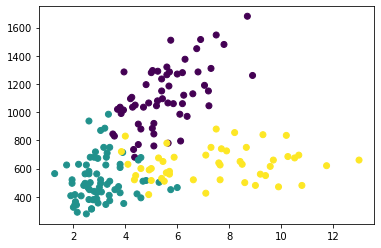

In [3]:
plt.scatter(x,y, c=z)
plt.show()

In [4]:
# 4：データの整形-------------------------------------------------------
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [5]:
 #解説 5：機械学習で分類する---------------------------------------------------
clf_result=svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0)#loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_std, z)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [6]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=model_selection.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.888562091503268
正解率の標準偏差 =  0.08938311756803621


In [7]:
# 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=model_selection.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.9444444444444444


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


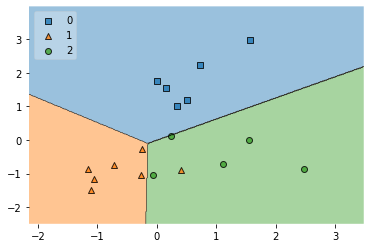

In [8]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [9]:
# 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[-0.75356629 -1.42408157 -0.78174612]
[[-0.17678771  2.02133769]
 [-2.49027598 -1.14715026]
 [ 1.84955225 -1.20466709]]
